In [2]:
import pandas as pd

In [39]:
# Read the Excel workbook
df = pd.read_excel('data/2018-usda-food-environment-atlas-dataset.xls')

In [46]:
# Load Access, Stores, Assistance, Insecurity, Local, Health, Restaurants, Socioeconomic data sheets as dataframes 

access = pd.read_excel('data/2018-usda-food-environment-atlas-dataset.xls', 'ACCESS')
stores = pd.read_excel('data/2018-usda-food-environment-atlas-dataset.xls', 'STORES')
assistance = pd.read_excel('data/2018-usda-food-environment-atlas-dataset.xls', 'ASSISTANCE')
insecurity = pd.read_excel('data/2018-usda-food-environment-atlas-dataset.xls', 'INSECURITY')
local = pd.read_excel('data/2018-usda-food-environment-atlas-dataset.xls', 'LOCAL')
health = pd.read_excel('data/2018-usda-food-environment-atlas-dataset.xls', 'HEALTH')
restaurants = pd.read_excel('data/2018-usda-food-environment-atlas-dataset.xls', 'RESTAURANTS')
socioeconomic = pd.read_excel('data/2018-usda-food-environment-atlas-dataset.xls', 'SOCIOECONOMIC')


In [47]:
# We're going to join all these sheets, so we'll drop redundant state and county cols from all but one.
# We'll also set the FIPS ID col to be index so we can use that for the join.
dfs = [stores, assistance, insecurity, local, health, restaurants, socioeconomic]
for df in dfs:
    df.drop(columns=['State', 'County'], axis=1, inplace=True)
    df.set_index('FIPS', inplace=True)

# Then, we'll also set the index on the Access df. This will be the dataframe we join the others onto.
access.set_index('FIPS', inplace=True)


In [53]:
# Combine all sheets into one dataframe by joining on FIPS col.
# Now we have a master dataframe containing the cols from all sheets.
master_df = access.join(dfs)

State                         0
County                        0
LACCESS_POP10                 0
LACCESS_POP15                19
PCH_LACCESS_POP_10_15        26
PCT_LACCESS_POP10             0
PCT_LACCESS_POP15            19
LACCESS_LOWI10                0
LACCESS_LOWI15               20
PCH_LACCESS_LOWI_10_15       28
PCT_LACCESS_LOWI10            0
PCT_LACCESS_LOWI15           20
LACCESS_HHNV10                0
LACCESS_HHNV15                3
PCH_LACCESS_HHNV_10_15       14
PCT_LACCESS_HHNV10            0
PCT_LACCESS_HHNV15            3
LACCESS_SNAP15               20
PCT_LACCESS_SNAP15           20
LACCESS_CHILD10               0
LACCESS_CHILD15              19
LACCESS_CHILD_10_15          28
PCT_LACCESS_CHILD10           0
PCT_LACCESS_CHILD15          19
LACCESS_SENIORS10             0
LACCESS_SENIORS15            19
PCH_LACCESS_SENIORS_10_15    26
PCT_LACCESS_SENIORS10         0
PCT_LACCESS_SENIORS15        19
LACCESS_WHITE15              19
                             ..
FFR14   

In [139]:
# These are the features I was interested in. Feel free to change them aroud as you see fit.
# The sheeet 'Variable List' contains descriptions of all available vars.
cols_of_interest = ['PCT_LACCESS_POP15', 'GROCPTH14', 'CONVSPTH14', 'SNAPSPTH12', 'WICSPTH12', 'FFRPTH14', 
                    'FOODINSEC_10_12', 'FMRKTPTH16', 'CSA12', 'FARM_TO_SCHOOL09', 'PCT_DIABETES_ADULTS13', 
                    'PCT_OBESE_ADULTS13', 'POVRATE15', 'MEDHHINC15', 'RECFACPTH14']

# Create a dataframe with just the cols of interest.
df = master_df[cols_of_interest]
df.shape

(3143, 15)

In [140]:
# Check for null values...
df.isnull().sum()

PCT_LACCESS_POP15        19
GROCPTH14                 0
CONVSPTH14                0
SNAPSPTH12                0
WICSPTH12                 0
FFRPTH14                  0
FOODINSEC_10_12           0
FMRKTPTH16                2
CSA12                    63
FARM_TO_SCHOOL09          5
PCT_DIABETES_ADULTS13     1
PCT_OBESE_ADULTS13        1
POVRATE15                 4
MEDHHINC15                4
RECFACPTH14               0
dtype: int64

In [141]:
# ...and drop them
df = df.dropna()
df.isnull().sum()

PCT_LACCESS_POP15        0
GROCPTH14                0
CONVSPTH14               0
SNAPSPTH12               0
WICSPTH12                0
FFRPTH14                 0
FOODINSEC_10_12          0
FMRKTPTH16               0
CSA12                    0
FARM_TO_SCHOOL09         0
PCT_DIABETES_ADULTS13    0
PCT_OBESE_ADULTS13       0
POVRATE15                0
MEDHHINC15               0
RECFACPTH14              0
dtype: int64

In [142]:
# dtypes look good
print(df.dtypes)

PCT_LACCESS_POP15        float64
GROCPTH14                float64
CONVSPTH14               float64
SNAPSPTH12               float64
WICSPTH12                float64
FFRPTH14                 float64
FOODINSEC_10_12          float64
FMRKTPTH16               float64
CSA12                    float64
FARM_TO_SCHOOL09         float64
PCT_DIABETES_ADULTS13    float64
PCT_OBESE_ADULTS13       float64
POVRATE15                float64
MEDHHINC15               float64
RECFACPTH14              float64
dtype: object


In [148]:
import seaborn as sns

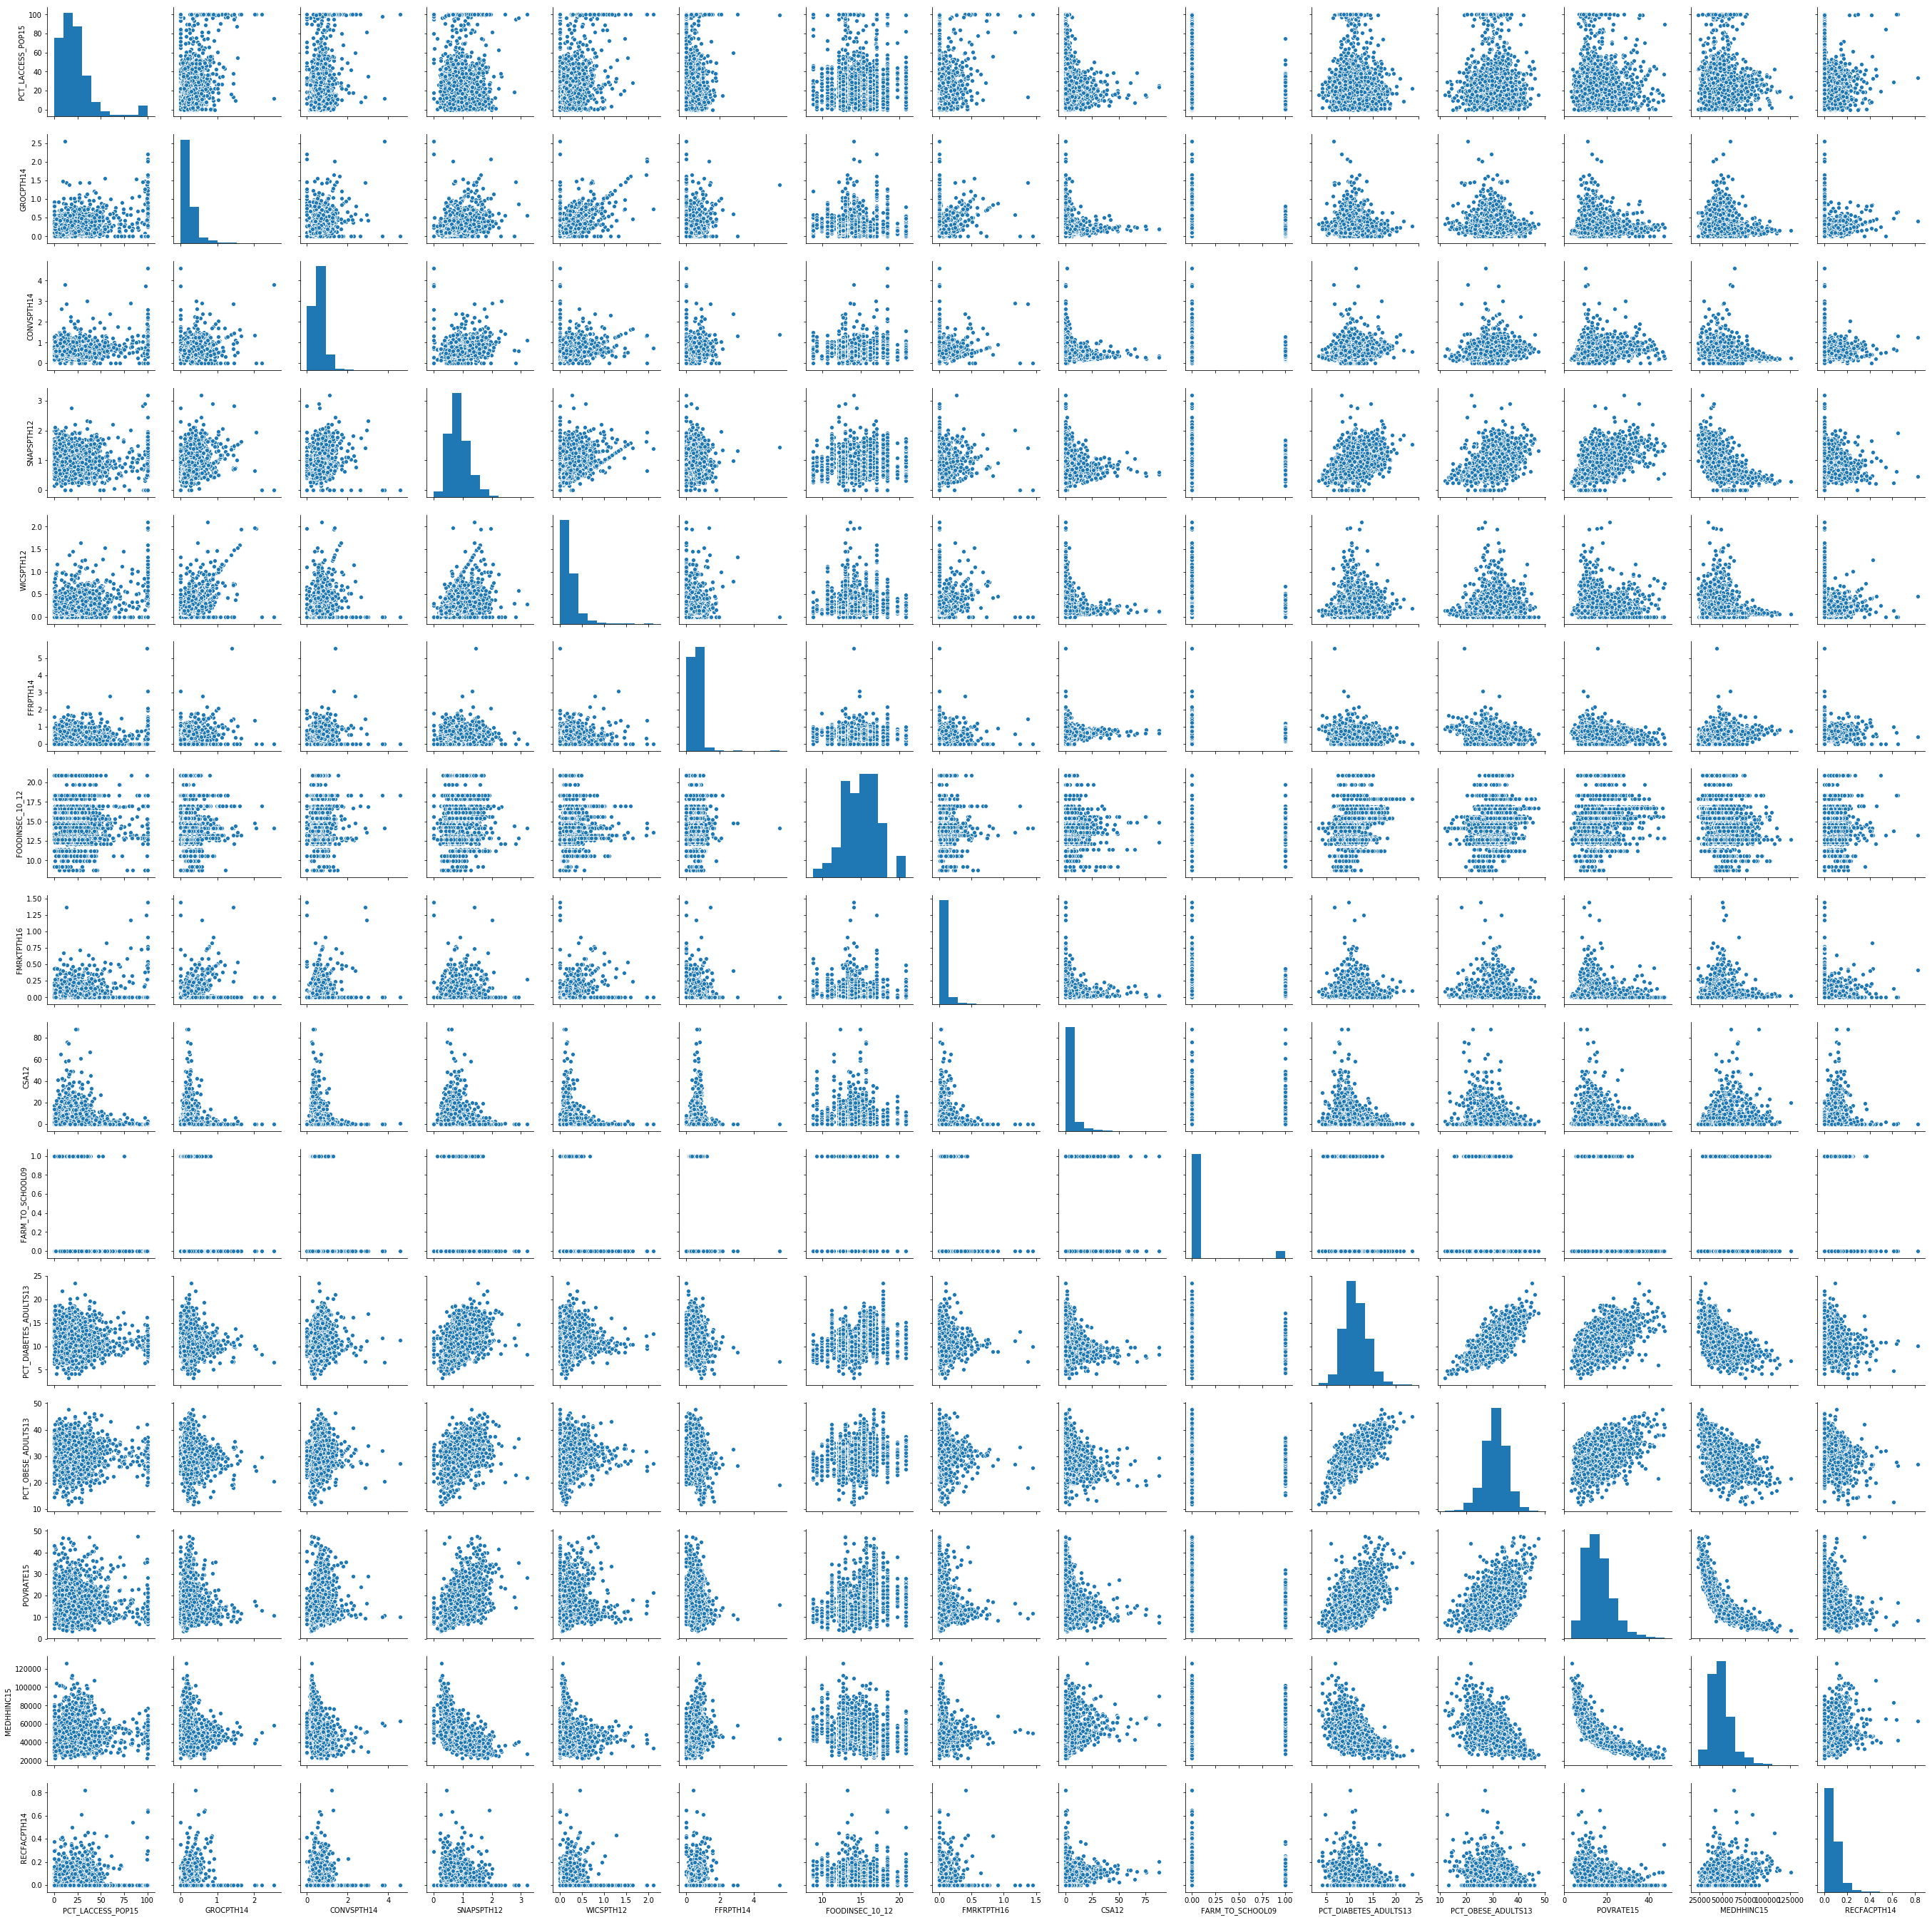

In [168]:
# We can look at scatter plots of each feature in pairs, to see if there is a correlation between them.
# You can double-click on a plot to enlarge.
# We may need to back-track and look at some other variables.
# This is the part where it would be good to get some input from the TAs.
sns.pairplot(df)

In [153]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [164]:
features = ['PCT_LACCESS_POP15', 'GROCPTH14', 'CONVSPTH14', 'SNAPSPTH12', 'WICSPTH12', 'FFRPTH14', 
            'FOODINSEC_10_12', 'FMRKTPTH16', 'CSA12', 'FARM_TO_SCHOOL09', 'POVRATE15', 'MEDHHINC15', 
            'PCT_DIABETES_ADULTS13', 'RECFACPTH14']
target = ['PCT_OBESE_ADULTS13']

In [167]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.33)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train our model
regr.fit(X_train, y_train)

# Make predictions
y_pred = regr.predict(X_test)

# R2 scores
print(r2_score(y_train, regr.predict(X_train)))
print(r2_score(y_test, y_pred))

0.5452410535840758
0.5076118584156646
